# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['EasyVisa.csv']))

Saving EasyVisa.csv to EasyVisa.csv


In [ ]:
data = data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Top 5 rows of data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
#Last 5 rows of data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
#Check for duplicated info 
data.duplicated().value_counts()

False    25480
dtype: int64



*   There is no data that is duplicated



In [ ]:
#Getting information on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB




*   There are 9 object types, 2 int types, and 1 float type in the data



In [ ]:
#Shape of the data
data.shape

(25480, 12)



*   There are 25480 rows and 12 columns in the data



In [ ]:
#Describe the data
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000




*   There are 25480 employees. The average year of company establishment is 1979 and average wage is 74455.81.



In [ ]:
#Looking at negative values in the data
data.loc[data['no_of_employees'] < 0].shape

(33, 12)



*   There are 33 rows that have a negative no_of_employees



In [ ]:
#Takes absolute value of the data
data["no_of_employees"] = abs(data["no_of_employees"])

In [ ]:
#Getting unique values of each object column 
object_columns = list(data.select_dtypes("object").columns)

for object_column in object_columns:
    print(data[object_column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
#Checking unique values in case_id
data["case_id"].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)



* Looks like there are quite a few of unique values in case_id
* I will drop the data as it is not neccessary for our analysis



In [ ]:
#Dropping case_id from the data
data.drop(["case_id"], axis =1, inplace = True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# created histogram and violinplot function to repeat plotting process for EDA on variables 
def histogram_violinplot(data, column, figsize=(20,15), kde=False, bins=None):

  plots, (sub_violin, sub_hist) = plt.subplots(
       nrows=2, 
       sharex=True,  
       gridspec_kw={"height_ratios": (0.25, 0.75)},
       figsize=figsize,
  )
  # setting style of background
  sns.set(style="darkgrid")
  # plotting a violin plot to show distribution
  sns.violinplot(
        data=data, x=column, kde=kde, ax=sub_violin, showmeans = True, palette="Blues"
  )
  # plotting a histogram to show distribution 
  sns.histplot(
        data=data, x=column, kde=kde, ax=sub_hist, palette ="Blues"
  )
  # puts line through the median of violinplot 
  sub_violin.axvline(
      data[column].median(), color = "purple", linestyle = "-"
  )
  # puts line through mean of histplot 
  sub_hist.axvline(
      data[column].median(), color = "purple", linestyle = "-"
  )
  # puts line through the median of violinplot 
  sub_violin.axvline(
       data[column].mean(), color = "red", linestyle = "--"
  )
  # puts line through mean of histplot 
  sub_hist.axvline(
       data[column].mean(), color = "red", linestyle = "--"
  )

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Observations on no_of_employees

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

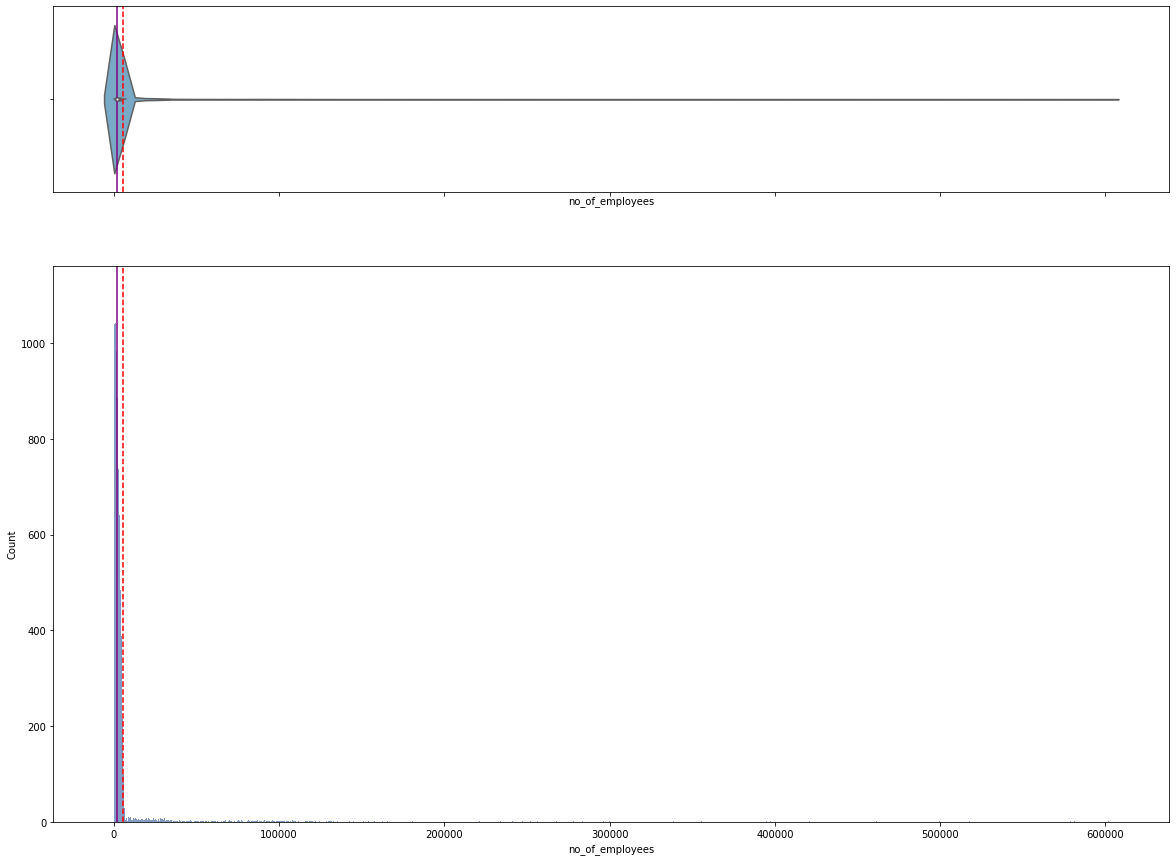

In [ ]:
histogram_violinplot(data, "no_of_employees")
data["no_of_employees"].describe()



*   The number of employees is 25480 and the average is 5667.



### Observations on prevailing wage

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

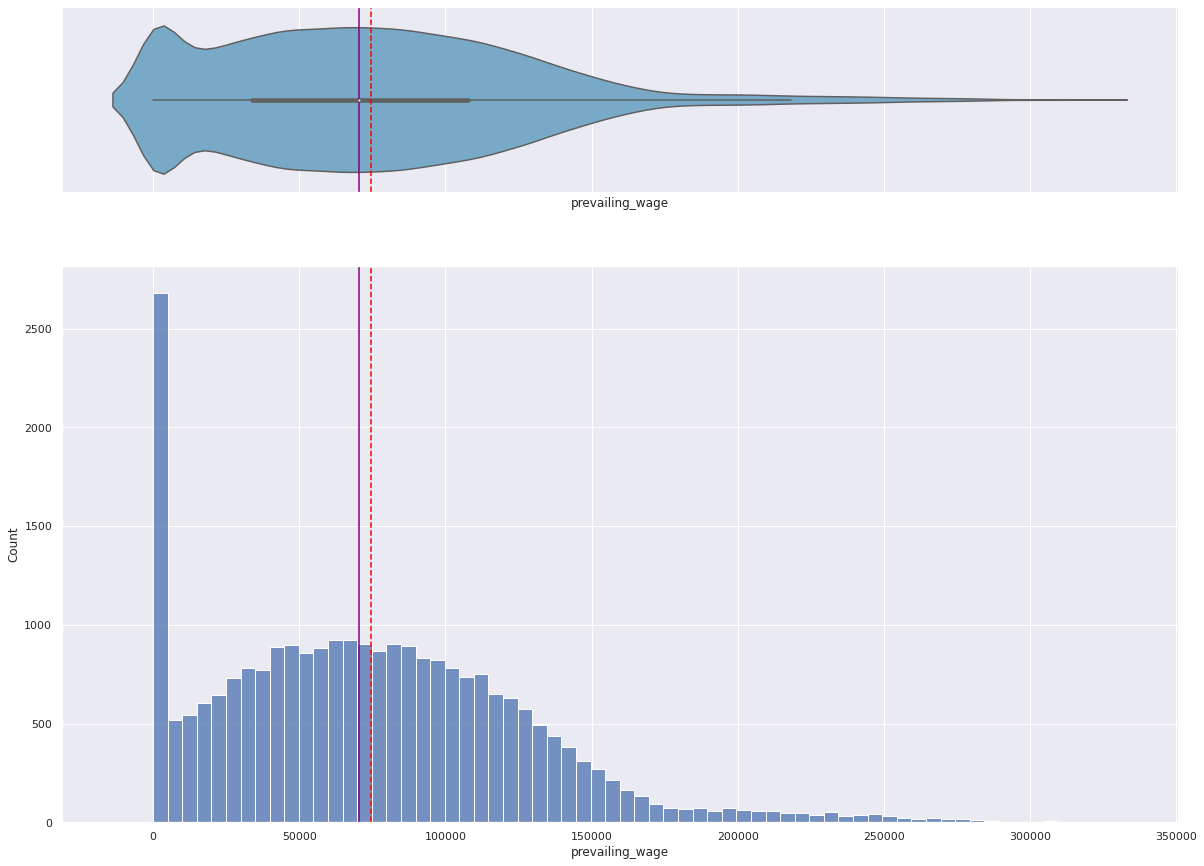

In [ ]:
histogram_violinplot(data, "prevailing_wage")
data["prevailing_wage"].describe()



*   The average wage is 74,455.81 with a standard deviation of 52815.94



In [ ]:
data.loc[data['prevailing_wage'] < 100, "unit_of_wage"].count

<bound method Series.count of 338      Hour
634      Hour
839      Hour
876      Hour
995      Hour
         ... 
25023    Hour
25258    Hour
25308    Hour
25329    Hour
25461    Hour
Name: unit_of_wage, Length: 176, dtype: object>

### Observations on continent

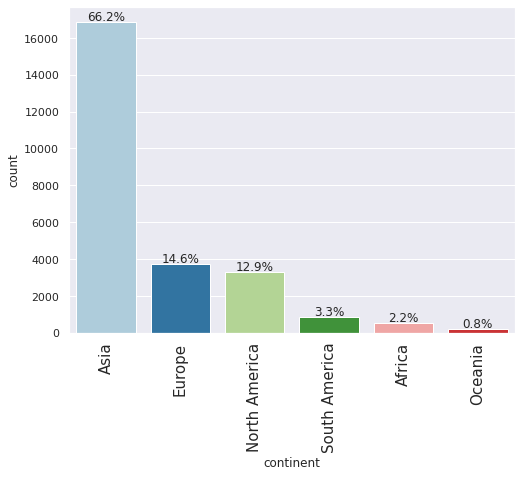

In [ ]:
labeled_barplot(data, "continent", perc=True) 



*   66.2% come from Asia, 14.6% come from Europe, and 12.9% come from North America.



### Observations on education of employee

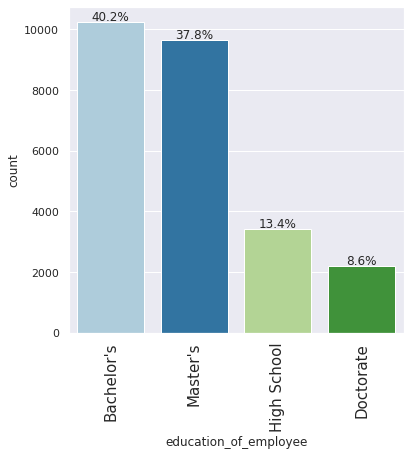

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True) 



*   40.2% have a Bachelors, 37.8% have a Masters, 13.4% have a High School degree, and 8.6% have a Doctorate


### Observations on job experience

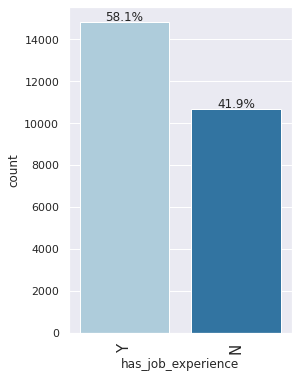

In [ ]:
labeled_barplot(data, "has_job_experience", perc=True) 



*   58.1% have job experience whereas 41.9% do not have job experience



### Observations on job training 

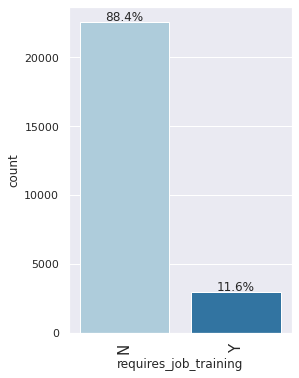

In [ ]:
labeled_barplot(data, "requires_job_training", perc=True) 



*   88.4% do not require job training and 11.6% do require training



### Observations on region of employment

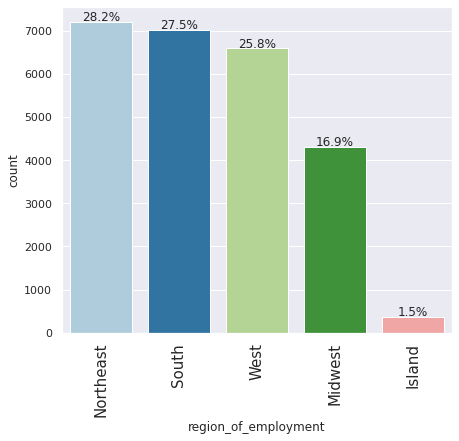

In [ ]:
labeled_barplot(data, "region_of_employment", perc=True) 



*   28.2% intend to work in Northeast, 27.5% intend to work in the South, 25.8% intend to work in the West, 16.9% intend to work in the Midwest, and 1.5% intend to work in Island



### Observations on unit of wage

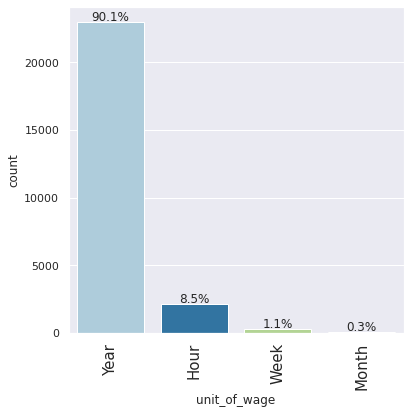

In [ ]:
labeled_barplot(data, "unit_of_wage", perc=True) 



*   Yearly is the most common unit of wage at 90.1%


### Observations on case status

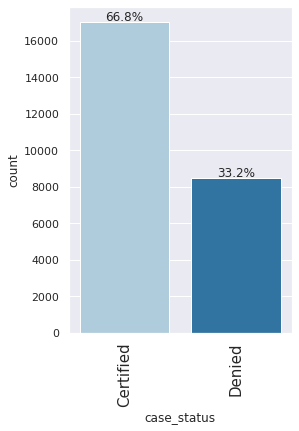

In [ ]:
labeled_barplot(data, "case_status", perc=True) 



*   66.8% of cases were certified and 33.2% of cases were denied



**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Education and Visa Certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


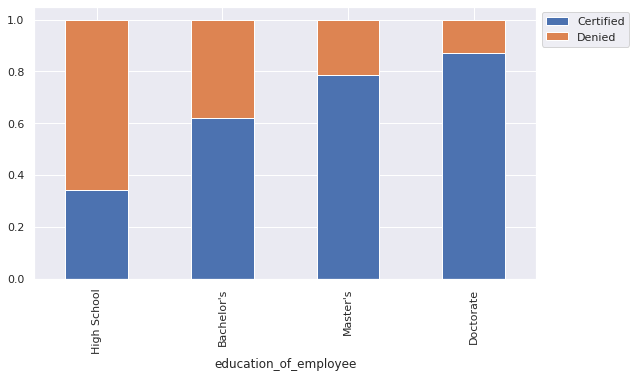

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")



*   As the education level increases, the probability of approval for certification increases
* Therefore, education plays a role in Visa Certification


### Continent and Visa Certification

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


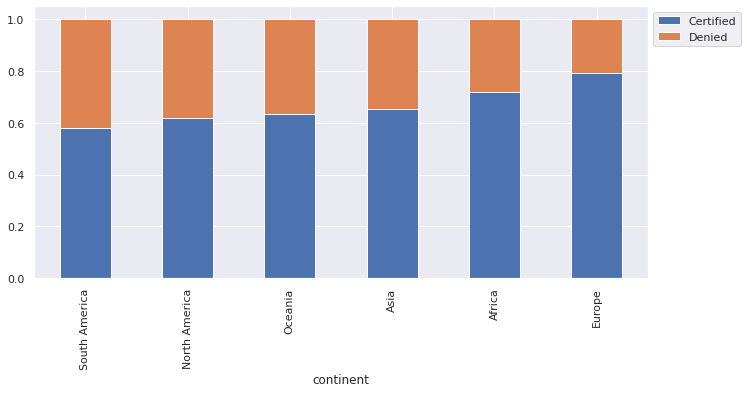

In [ ]:
stacked_barplot(data, "continent", "case_status")



*   People in Europe have the highest probability of being certified, with Africa second, and Asia third
* Compared to education, it doesn't seem as influential; however, there is a probability difference amongst continents nonetheless



### Pay Unit and Visa Certification

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


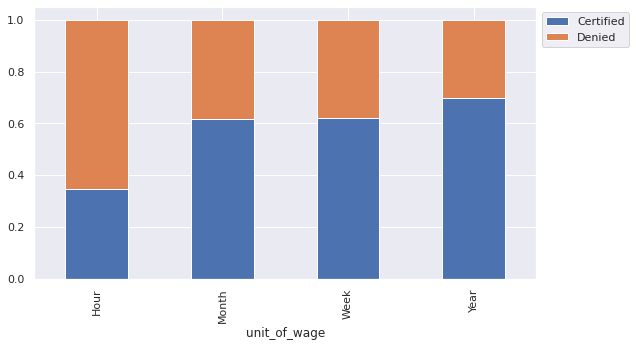

In [ ]:
stacked_barplot(data, "unit_of_wage", "case_status")



*   Those in yearly, weekly, and monthly have a much higer probability of certification than hourly



### Work Experience and Visa Certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


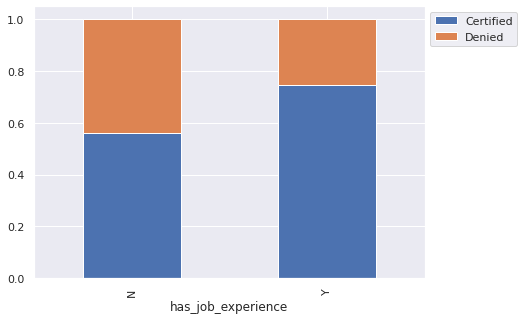

In [ ]:
stacked_barplot(data, "has_job_experience", "case_status")



*   The probability of being certified is greater with work experience



### Pay Unit and Visa Certification in the United States

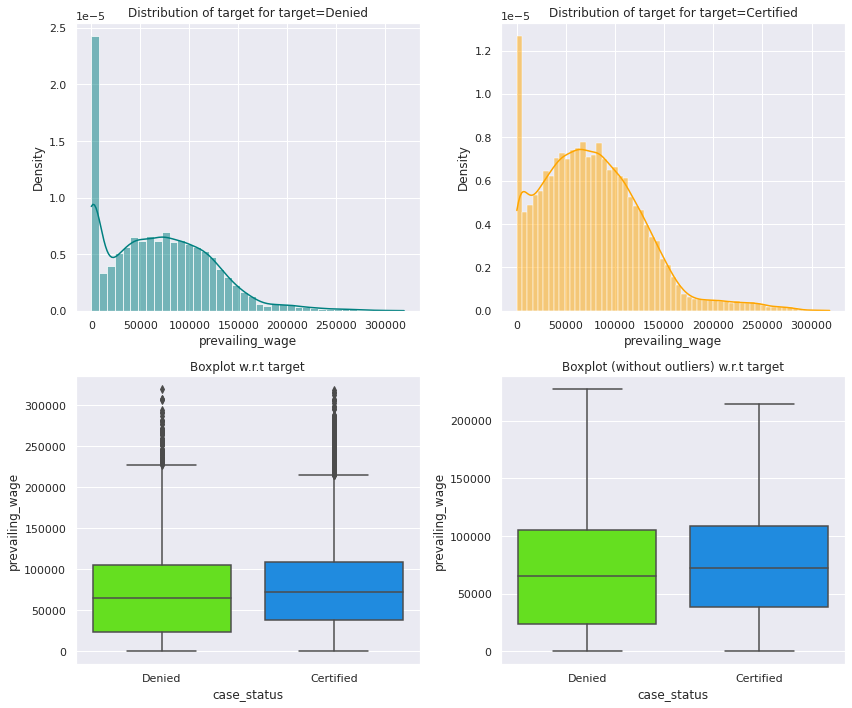

In [ ]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")



*   The density distribution of denied compared to certified is much lower in prevailing wage



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

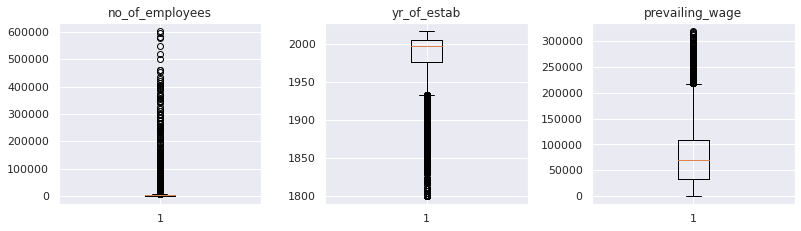

In [ ]:
# Checking for outliers using boxplot 
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()



*   There are a decent amount of outliers in prevailing_wage 



In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(["case_status"], axis = 1) 
Y = data["case_status"]


X = pd.get_dummies(X, drop_first = True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64




*   Around 67% of observations belong to certified and 33% belong to denied
* This is preserved in the train and test sets



In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Building a Decision Tree Model

In [ ]:
model_decisiontree = DecisionTreeClassifier(random_state=1)
model_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Checking performance on training set

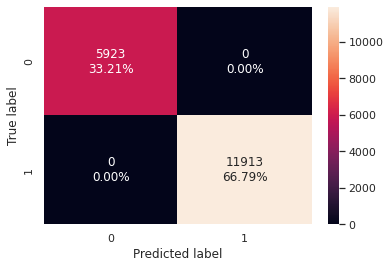

In [ ]:
confusion_matrix_sklearn(model_decisiontree, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model_decisiontree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0





*   All of the model's scores are 1.0




### Checking performance on test set

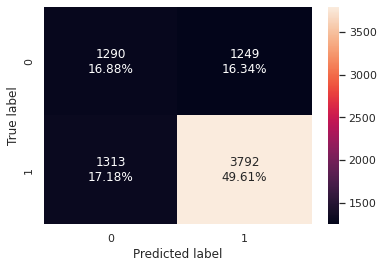

In [ ]:
confusion_matrix_sklearn(model_decisiontree, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model_decisiontree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487




* The model's scores have reduced from 1 to .66 for accuracy, .74 for recall, .75 for precision, and .74 for f1_score.
* The model was overfitting the training data and now we have a generalized model



### Pruning the Tree

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

### Checking performance on training 

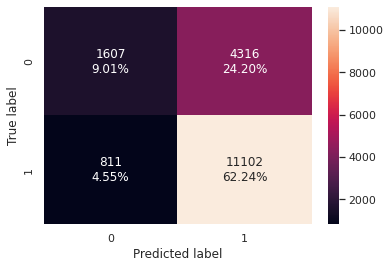

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411




*   The model's accuracy is now .71, recall is .93, precision is .72, and .81 is f1_score.



### Checking performance on testing

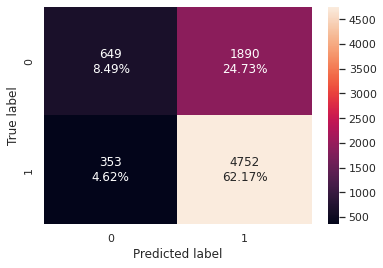

In [ ]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058




* After pruning the tree, the performance of both training and testing are more inline



## Building bagging and boosting models

### Bagging 

In [ ]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

### Checking performance of training 

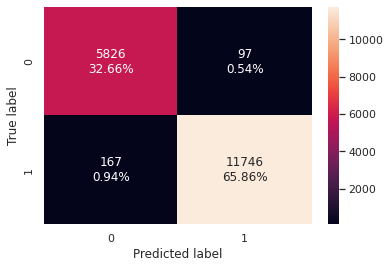

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train) 

In [ ]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_estimator, X_train, y_train) 
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


* All of the model's values are close to 1 for bagging 

### Checking performance of testing

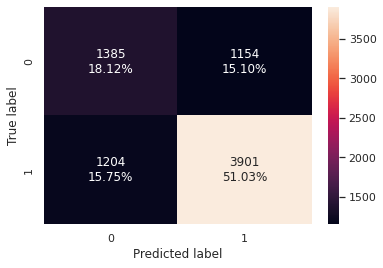

In [ ]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test) 

In [ ]:
bagging_classifier_model_test_perf =  model_performance_classification_sklearn(bagging_estimator, X_test, y_test) 
bagging_classifier_model_test_perf 

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


* All values from the train to test decreased significantly 
* The model on the training data is overfitting since both accuracy and recall are much higher than test accuracy and test recall

##  Will tuning the hyperparameters improve the model performance?

### Bagging Tuned

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

### Checking performance on training 

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train) 

In [ ]:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf



*   All the model's values are close to 1



### Checking performance on testing

In [ ]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test) 

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf



* All values from the train to test decreased significantly 
* The model on the training data is overfitting since both accuracy and recall are much higher than test accuracy and test recall



### Random Forest

In [ ]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

### Checking performance on training 

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train) 

In [ ]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf



*   The model's f1 score is .99


### Checking performance on testing

In [ ]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test) 

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

* Bagging, bagging tuned, and random forest are suffering from overfitting in the train data

### Random Forest Tuned

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

### Checking performance on training


In [ ]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train) 

In [ ]:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf



*   After tunning the random forest, the accuracy is now .76, recall is .91, precision is .77, and f1 score is .84



### Checking performance on testing

In [ ]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test) 

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf



*   The train and testing data have much similar values in the random forest tuned compared to random forest



## Boosting

### AdaBoost 

In [ ]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

### Checking performance on training

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_train, y_train) 

In [ ]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf



*   The accuracy is .73, recall is .88, precision is .76, and f1 score is .81



### Checking performance on testing

In [ ]:
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf



*   The training and testing is very close signifying that the data is not overfiting



### AdaBoost Tuned

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

### Checking performance on training

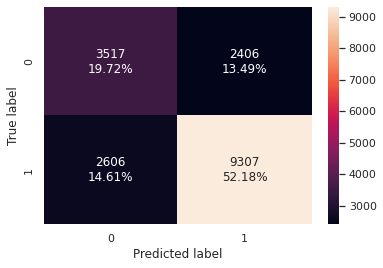

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861




*   The accuracy is .71, recall is .78, precision is .79, and f1 score is .78


### Checking performance on testing

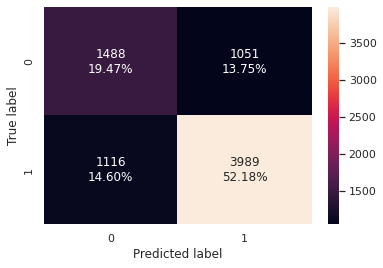

In [ ]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397



  
* Tunning reduced our F1 score slightly
* Both models are very similar to each other


### Gradient Boosting 

In [ ]:
gb_classifier  = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gb_classifier .fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

### Checking performance on training

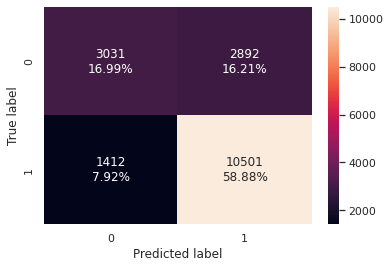

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922




*   The accuracy is .75, recall is .88, precision is .78, and f1 score is .82



### Checking performance on testing

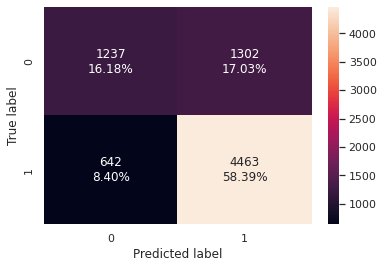

In [ ]:
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159



* There is almost no overfitting in the model



### Gradient Boosting Tuned

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

### Checking performance on training

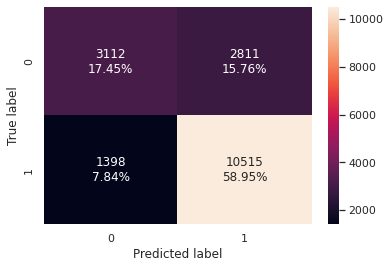

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234




*   The accuracy is .76, recall is .88, precision is .78, and f1 score is .83



### Checking performance on testing

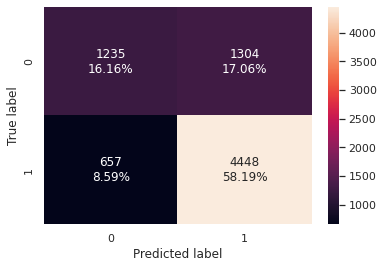

In [ ]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379




*   All the values have decreased from train to test marginally



### XGBoost

In [ ]:
xgb_classifier = XGBClassifier(random_state=1,eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

### Checking performance on training

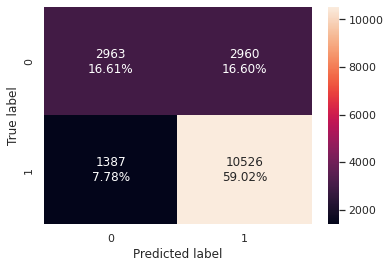

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756279,0.883573,0.780513,0.828852




*   The accuracy is .75, recall is .88, precision is .78, and f1 is .82



### Checking performance on testing

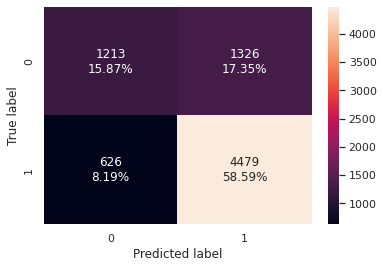

In [ ]:
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744636,0.877375,0.771576,0.821082




*   All values have decreased from the train to test data



### XGBoost Tuned

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.9,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

### Checking performance on training

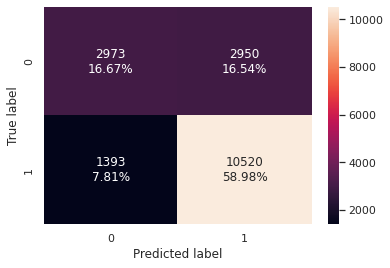

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756504,0.883069,0.780995,0.828901




*   The model's accuracy is .75, recall is .88, precision is .78, and f1 score is .82



### Checking performance on testing

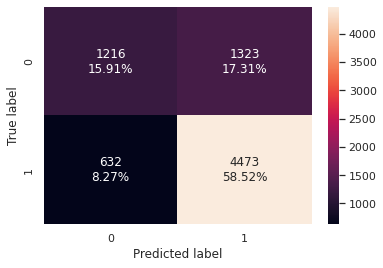

In [ ]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744244,0.8762,0.771739,0.820659




*   All values have decreased from the train to test data




### Stacking

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(estimators, final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                  

### Checking performance on training

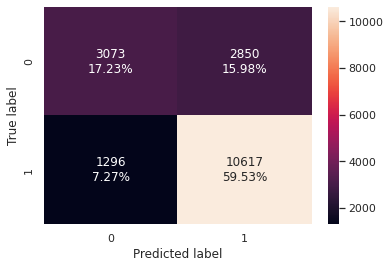

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.767549,0.891211,0.788372,0.836643




*   The accuracy is .76, recall is .89, precision is .78, and f1 is .83



### Checking performance on testing

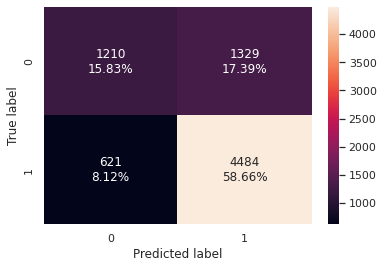

In [ ]:
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744898,0.878355,0.771375,0.821396



 
*   All values have decreased from the train to test data




## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758690,0.764017,0.756279,0.756504,0.767549
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.881474,0.882649,0.883573,0.883069,0.891211
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.784066,0.789059,0.780513,0.780995,0.788372
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.829922,0.833234,0.828852,0.828901,0.836643


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.745683,0.743459,0.744636,0.744244,0.744898
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.874241,0.871303,0.877375,0.876200,0.878355
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.774154,0.773296,0.771576,0.771739,0.771375
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.821159,0.819379,0.821082,0.820659,0.821396



*   The best model to follow is XGBoost or XGBoost Tuned due to the accuracy, recall, precision, and f1 score from train and test data.




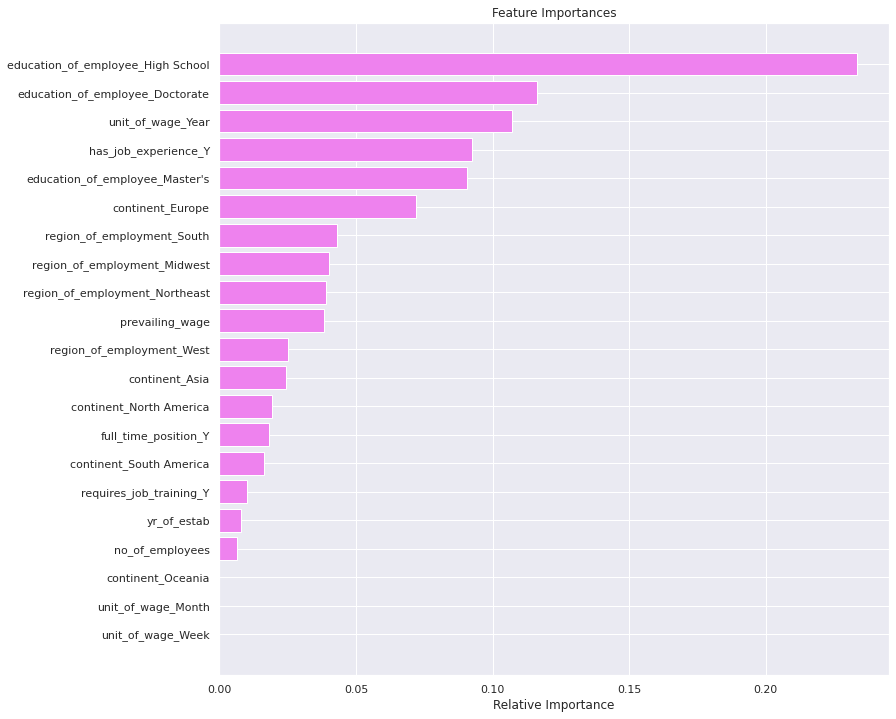

In [ ]:
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   The most important features are education_of_employee_high_school, education_of_employee_doctorate, and unit_of_wage_year



## Actionable Insights and Recommendations



*   Based on the training and testing models, XGBoost and XGBoost Tuned are the most appropiate models to follow

* Drivers of importance for certification are education_of_employee_high_school, education_of_employee_doctorate, and unit_of_wage_year

* OFLC should focus their time on education, wage, and experience to locate talent that has a higher change of passing certification

* Because applications are increasing, the OFLC should release average accepted profile stats to deter so many applicants from applying for fewer spots 


